## Preface
In this notebook, we show how to reproduce the results of the paper: figures and tables. 
All these results are derived from the annotated dataset of bugs produced by the authors via manual inspection of each bug fix, commit informations and related github issue(s).

In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
# DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import random
import string
import re

from tqdm import tqdm
import datetime

from utils import *
from utils_diff import *

In [3]:
# DATA PATHs
PATH_ANNOTATED_DATASET = "../artifacts/annotation_bugs.csv"
PATH_OUTPUT_RESULTS = "../reproducibility_results"  # where to store figures

In [4]:
# FLAG AND CONFIG
SHOW_LATEX = True
PERC_DECIMAL_PLACES = 1

In [5]:
# READ DATA
df_bugs = read_bugs(PATH_ANNOTATED_DATASET)
df_bugs.head()

,id,real,type,repo,commit_hash,component,symptom,bug_pattern,complexity,comment,localization
0,1,bug,Classical,Qiskit/qiskit-ignis,ec1b4ce759f1fb8ba0242dd6c4a309fa1b586666,Quantum State Evaluation,"Crash - OS/PL Error, Crash",Missing Error Handling,19,"From fixer: ""Currently, cvx_fit does not check...",https://github.com/Qiskit/qiskit-ignis/commit/...
1,10,bug,Quantum,Qiskit/qiskit-ignis,e696fee3e52550f50fb240a4c6356c61c9f01725,Quantum State Evaluation,Incorrect Output,Incorrect Numerical Computation,2,"Reporter: ""ignis.characterization.calibrations...",https://github.com/Qiskit/qiskit-ignis/commit/...
2,1010,bug,Quantum,Qiskit/qiskit-aer,dc7a2413e6c373455c00cff51e37eaaa17a4a7ac,Optimizations,"Crash - Application Error, Crash",Barrier Related,6,"Fixer: ""Currently qubit truncation will fail f...",https://github.com/Qiskit/qiskit-aer/commit/dc...
3,1012,bug,Classical,Qiskit/qiskit-aer,7de864cc989b354d0ad1febbd62b891270927b6b,Testing,Failing Test,"Flaky Test, Misconfiguration, Misconfiguration...",1,"Fix issue where the ""diagonal"" gate is checked...",https://github.com/Qiskit/qiskit-aer/commit/7d...
4,1019,bug,Quantum,Qiskit/qiskit-aer,f3b4303f478ff84bf8da15761827287d3a2f16e4,Simulator,Incorrect Output,"API Misuse - Internal, Typo",1,"Fixer: ""The new Diagonal terra gate was being ...",https://github.com/Qiskit/qiskit-aer/commit/f3...


## RQ1: Classical vs. Quantum-Specific Bugs

In [6]:
tot_bugs = len(df_bugs)
tot_bugs_quantum = len(df_bugs[df_bugs['type'] == 'Quantum'])
perc_bugs_quantum = round((float(tot_bugs_quantum) / tot_bugs) * 100, PERC_DECIMAL_PLACES)
tot_bugs_classical = len(df_bugs[df_bugs['type'] == 'Classical'])
perc_bugs_classical = round((float(tot_bugs_classical) / tot_bugs) * 100, PERC_DECIMAL_PLACES)
print(f"The dataset of {tot_bugs} bugs contains:")
print(f"- {tot_bugs_quantum} quantum bugs ({perc_bugs_quantum}%)")
print(f"- {tot_bugs_classical} quantum bugs ({perc_bugs_classical}%)")

The dataset of 223 bugs contains:
- 89 quantum bugs (39.9%)
- 134 quantum bugs (60.1%)


## RQ2: Where in Quantum Computing Platforms Do the Bugs Occur?

223 records received 255 annotations in the column(s): ['component'].


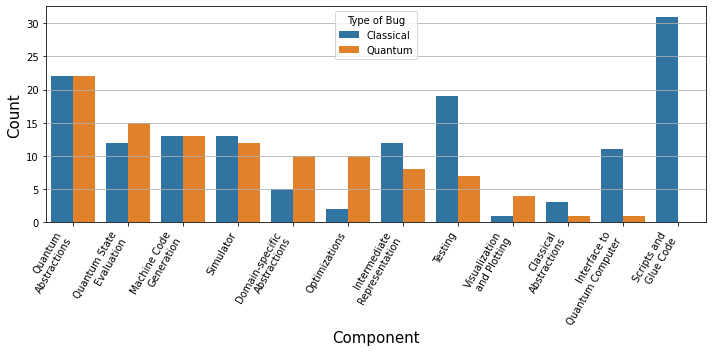

In [7]:
plot_bar_chart_quantum_vs_classical(
    df_bugs=df_bugs,
    column_to_inspect="component",
    mapping_dict=ALIAS_COMPONENTS_SHORT,
    categories_to_exclude=['Tutorial and Examples'],
    out_file_name="RQ2_components.pdf",
    out_folder_path=PATH_OUTPUT_RESULTS
)

##  RQ3: How do the Bugs Manifest?

In [8]:
plot_diagram_value(
    df_bugs=df_bugs,
    column_to_inspect="symptom",
    exclude_values=["Unclear"],
    mapping_latex=ALIAS_FOR_HIERARCHY_OF_SYMPTOMS,
    latex_format=False
)

223 records received 332 annotations in the column(s): ['symptom'].
--------------------------------------------------------------------------------
'Compilation Error' was annotated 2 time(s).
'Crash' was annotated 92 time(s).
'Crash - Application Error' was annotated 25 time(s).
'Crash - OS/PL Error' was annotated 67 time(s).
'Failing Test' was annotated 16 time(s).
'Incorrect Final Measurement' was annotated 15 time(s).
'Incorrect Output' was annotated 77 time(s).
'Incorrect Visualization' was annotated 2 time(s).
'Inefficiency' was annotated 8 time(s).
'Non-termination' was annotated 1 time(s).
'Other Non-functional' was annotated 6 time(s).
--------------------------------------------------------------------------------


223 records received 332 annotations in the column(s): ['symptom'].


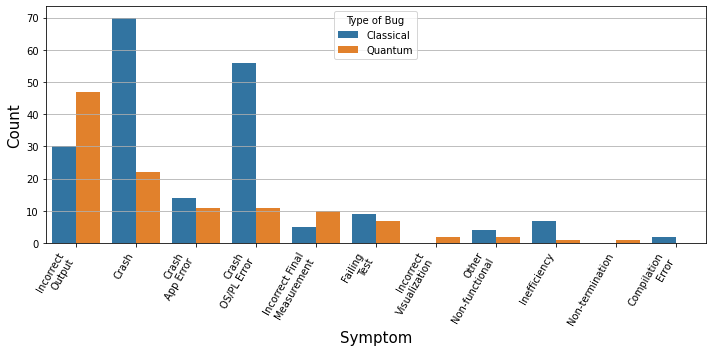

In [9]:
plot_bar_chart_quantum_vs_classical(
    df_bugs=df_bugs,
    column_to_inspect="symptom",
    mapping_dict=ALIAS_SYMPTOMS_SHORT,
    categories_to_exclude=['Unclear'],
    out_file_name="RQ3_symptoms.pdf",
    out_folder_path=PATH_OUTPUT_RESULTS
)

 ## RQ4: Bug Patterns

In [10]:
plot_diagram_value(
    df_bugs=df_bugs,
    column_to_inspect="bug_pattern",
    exclude_values=["Incorrect Application Logic"],
    mapping_latex=ALIAS_FOR_HIERARCHY_OF_BUG_PATTERNS,
    latex_format=False
)

223 records received 331 annotations in the column(s): ['bug_pattern'].
--------------------------------------------------------------------------------
'API Misuse - External' was annotated 3 time(s).
'API Misuse - Internal' was annotated 10 time(s).
'API Outdated - External' was annotated 8 time(s).
'API Outdated - Internal' was annotated 5 time(s).
'Barrier Related' was annotated 2 time(s).
'Chain Strength' was annotated 1 time(s).
'Concurrency' was annotated 1 time(s).
'Conflicting Statements' was annotated 2 time(s).
'Flaky Test' was annotated 4 time(s).
'GPU related' was annotated 4 time(s).
'Imprecise Result' was annotated 4 time(s).
'Incorrect Circuit' was annotated 2 time(s).
'Incorrect IR - Missing Information' was annotated 8 time(s).
'Incorrect IR - Wrong Information' was annotated 21 time(s).
'Incorrect Numerical Computation' was annotated 11 time(s).
'Incorrect Randomenss Handling' was annotated 5 time(s).
'Incorrect Resource Access' was annotated 1 time(s).
'Incorrect Re

In [11]:
# table for API 
df = expand_columns(df_bugs, 'bug_pattern')

n_api_misuse_int = len(df[df['bug_pattern'] == "API Misuse - Internal"])
n_api_misuse_ext = len(df[df['bug_pattern'] == "API Misuse - External"])
n_api_outdated_int = len(df[df['bug_pattern'] == "API Outdated - Internal"])
n_api_outdated_ext = len(df[df['bug_pattern'] == "API Outdated - External"])

table = pd.DataFrame({
    "API issue type": ["API Misuse", "API Outdated"],
    "Internal": [n_api_misuse_int, n_api_outdated_int],
    "External": [n_api_misuse_ext, n_api_outdated_ext]
})
print(table.to_latex(index=False))

223 records received 331 annotations in the column(s): ['bug_pattern'].
\begin{tabular}{lrr}
\toprule
API issue type &  Internal &  External \\
\midrule
    API Misuse &        10 &         3 \\
  API Outdated &         5 &         8 \\
\bottomrule
\end{tabular}



223 records received 331 annotations in the column(s): ['bug_pattern'].


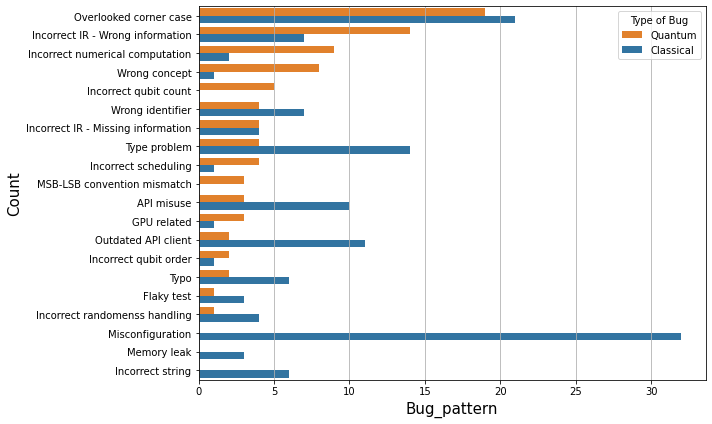

In [12]:
plot_bar_chart_quantum_vs_classical(
    df_bugs=df_bugs,
    column_to_inspect="bug_pattern",
    mapping_dict=ALIAS_BUG_PATTERN_SHORT,
    categories_to_exclude=["Incorrect Application Logic"],
    categories_keep_only=ALIAS_BUG_PATTERN_SHORT.keys(),
    out_file_name="RQ4_bug_pattern.pdf",
    out_folder_path=PATH_OUTPUT_RESULTS,
    horizontal=True,
    map_value_since_beginning=True,
    figsize=(10, 6),
    legend_placement='best'
)

 ## RQ5: How Complex are the Bug Fixes?

Complexity normalization: 223 (before) > 223 (after)
['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20+', '']


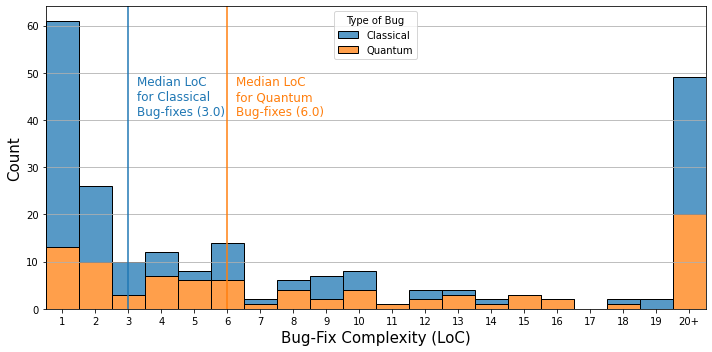

In [58]:
plot_histogram_quantum_vs_classical(
    df_bugs=df_bugs,
    column_to_inspect="complexity",
    column_label_name="Bug-Fix Complexity",
    column_abbreviation="LoC",
    cap_value=20,
    out_file_name="RQ5_complexity_old.pdf",
    out_folder_path=PATH_OUTPUT_RESULTS
)

## Compute Differences

In [19]:
df_diff = compute_diff_per_bug(
    path_repo_folder="../artifacts/minimal_commits_v02", 
    repos_subfolders=[
        'mitiq',
        'qsharp-runtime',
        'strawberryfields',
        'tequila',
        'pennylane',
        'qiskit-terra',
        'qiskit-aer',
        'qsharp-compiler',
        'amazon-braket-sdk-python',
        'dwave-system',
        'qiskit-ignis',
        'OpenQL',
        'ProjectQ',
        'pyquil',
        'QuantumLibraries',
        'qulacs',
        'xacc',
        'Cirq'
    ]
)
df_bugs_w_diff = pd.merge(
    left=df_bugs,
    right=df_diff,
    on=['id', 'commit_hash']
)
df_bugs_w_diff.head()

../artifacts/minimal_commits_v02/mitiq/mitiq#125/before/folding.py
../artifacts/minimal_commits_v02/mitiq/mitiq#125/after/folding.py
folding.py
@@ -593,7 +593,7 @@

 
     # Fold remaining gates until the stretch is reached
     ops = list(base_circuit.all_operations())
-    num_to_fold = int(round(fractional_stretch * len(ops)))
+    num_to_fold = int(round(fractional_stretch * len(ops) / 2))
 
     if num_to_fold > 0:
         folded += Circuit([inverse(ops[-num_to_fold:])], [ops[-num_to_fold:]])
Hunk 0
{'added': [(597, '    num_to_fold = int(round(fractional_stretch * len(ops) / 2))')], 'deleted': [(597, '    num_to_fold = int(round(fractional_stretch * len(ops)))')]}
../artifacts/minimal_commits_v02/mitiq/mitiq#425/before/guide-getting-started.rst
../artifacts/minimal_commits_v02/mitiq/mitiq#425/after/guide-getting-started.rst
guide-getting-started.rst
@@ -221,6 +221,8 @@

             optimization_level=0,
             noise_model=noise_model,
             shots=shots,
+          

Hunk 3
{'added': [(42, '            public override Func<long, long> __Body__ => (arg) => (~arg);')], 'deleted': [(42, '            public override Func<long, long> Body => (arg) => (~arg);')]}
Hunk 4
{'added': [(61, '            public override Func<long, long> __Body__ => ParityFunc;')], 'deleted': [(61, '            public override Func<long, long> Body => ParityFunc;')]}
Hunk 5
{'added': [(85, '            public override Func<IQArray<Pauli>, long> __Body__ => XBitsFunc;')], 'deleted': [(85, '            public override Func<IQArray<Pauli>, long> Body => XBitsFunc;')]}
Hunk 6
{'added': [(109, '            public override Func<IQArray<Pauli>, long> __Body__ => ZBitsFunc;')], 'deleted': [(109, '            public override Func<IQArray<Pauli>, long> Body => ZBitsFunc;')]}
QCTraceSimulator.Interface.Clifford.cs
@@ -16,7 +16,7 @@

                 tracerCore = m;
             }
 
-            public override Func<(long, Pauli, Qubit), QVoid> Body
+            public override Func<(long,

qubit.py
@@ -2646,6 +2646,8 @@

 
         return decomp_ops
 
+    def adjoint(self):
+        return QFT(wires=self.wires).inv()
 
 # =============================================================================
 # Quantum chemistry
Hunk 0
{'added': [(2650, '    def adjoint(self):'), (2651, '        return QFT(wires=self.wires).inv()')], 'deleted': []}
../artifacts/minimal_commits_v02/pennylane/pennylane#35/before/gaussian.py
../artifacts/minimal_commits_v02/pennylane/pennylane#35/after/gaussian.py
../artifacts/minimal_commits_v02/pennylane/pennylane#35/before/fock.py
../artifacts/minimal_commits_v02/pennylane/pennylane#35/after/fock.py
gaussian.py
@@ -35,7 +35,7 @@

 
 operator_map = {
     'CoherentState': Coherent,
-    'DisplacedSqueezed': DisplacedSqueezed,
+    'DisplacedSqueezedState': DisplacedSqueezed,
     'SqueezedState': Squeezed,
     'ThermalState': Thermal,
     'GaussianState': Gaussian,
Hunk 0
{'added': [(39, "    'DisplacedSqueezedState': DisplacedSqueezed,")], 'del

matrix_product_state_internal.cpp
@@ -866,7 +866,14 @@

     double renorm = 1 / std::sqrt(1. - accum);
     cmatrix_t temp_mat = kmats.back()* renorm;
     apply_matrix_internal(qubits, temp_mat);
-  }
+  }  
+  uint_t min_qubit = qubits[0];
+  uint_t max_qubit = qubits[0];
+  for (uint_t i=qubits[0]; i<qubits.size(); i++) {
+    min_qubit = std::min(min_qubit, qubits[i]);
+    max_qubit = std::max(max_qubit, qubits[i]);
+  }
+  propagate_to_neighbors_internal(min_qubit, max_qubit);
 }
 
 void MPS::centralize_qubits(const reg_t &qubits, 
@@ -1491,21 +1498,24 @@

     measurement_matrix = measurement_matrix * (1 / sqrt(prob1));
   }
   apply_matrix_internal(qubits_to_update, measurement_matrix);
-
+  propagate_to_neighbors_internal(qubit, qubit);
+  return measurement;
+}
+
+void MPS::propagate_to_neighbors_internal(uint_t min_qubit, uint_t max_qubit) {
   // step 4 - propagate the changes to all qubits to the right
-  for (uint_t i=qubit; i<num_qubits_-1; i++) {
+  for (uint_t i=max_q

noise.py
@@ -11,7 +11,7 @@

 # ANY KIND, either express or implied. See the License for the specific
 # language governing permissions and limitations under the License.
 
-from typing import Any, Sequence
+from typing import Any, Optional, Sequence
 
 from braket.circuits.quantum_operator import QuantumOperator
 from braket.circuits.qubit_set import QubitSet
@@ -26,14 +26,10 @@

     the metadata that defines what the noise channel is and what it does.
     """
 
-    def __init__(
-        self,
-        qubit_count: int,
-        ascii_symbols: Sequence[str],
-    ):
-        """
-        Args:
-            qubit_count (int): Number of qubits this noise channel interacts with.
+    def __init__(self, qubit_count: Optional[int], ascii_symbols: Sequence[str]):
+        """
+        Args:
+            qubit_count (int, optional): Number of qubits this noise channel interacts with.
             ascii_symbols (Sequence[str]): ASCII string symbols for this noise channel. These
           

../artifacts/minimal_commits_v02/pyquil/pyquil#55/before/job_results.py
../artifacts/minimal_commits_v02/pyquil/pyquil#55/after/job_results.py
job_results.py
@@ -100,7 +100,7 @@

     """
     num_octets = len(coef_string)
     num_addresses = len(classical_addresses)
-    num_memory_octets = int(_round_to_next_multiple(num_addresses, 8) / 8)
+    num_memory_octets = _round_to_next_multiple(num_addresses, 8) // 8
     num_wavefunction_octets = num_octets - num_memory_octets
 
     # Parse the classical memory
@@ -112,7 +112,7 @@

     mem = mem[0:num_addresses]
 
     # Parse the wavefunction
-    wf = np.zeros(int(num_wavefunction_octets / OCTETS_PER_COMPLEX_DOUBLE), dtype=np.cfloat)
+    wf = np.zeros(num_wavefunction_octets // OCTETS_PER_COMPLEX_DOUBLE, dtype=np.cfloat)
     for i, p in enumerate(range(num_memory_octets, num_octets, OCTETS_PER_COMPLEX_DOUBLE)):
         re_be = coef_string[p: p + OCTETS_PER_DOUBLE_FLOAT]
         im_be = coef_string[p + OCTETS_PER_DOUBLE_FLOAT: p + 

,id,real,type,repo,commit_hash,component,symptom,bug_pattern,complexity,comment,localization,human_id,project_name,n_lines,n_hunks,n_files,comprehensive_id
0,1,bug,Classical,Qiskit/qiskit-ignis,ec1b4ce759f1fb8ba0242dd6c4a309fa1b586666,Quantum State Evaluation,"Crash - OS/PL Error, Crash",Missing Error Handling,19,"From fixer: ""Currently, cvx_fit does not check...",https://github.com/Qiskit/qiskit-ignis/commit/...,qiskit-ignis#3,qiskit-ignis,17,1,1,qiskit-ignis#3 (1)
1,10,bug,Quantum,Qiskit/qiskit-ignis,e696fee3e52550f50fb240a4c6356c61c9f01725,Quantum State Evaluation,Incorrect Output,Incorrect Numerical Computation,2,"Reporter: ""ignis.characterization.calibrations...",https://github.com/Qiskit/qiskit-ignis/commit/...,qiskit-ignis#302,qiskit-ignis,2,2,1,qiskit-ignis#302 (10)
2,1010,bug,Quantum,Qiskit/qiskit-aer,dc7a2413e6c373455c00cff51e37eaaa17a4a7ac,Optimizations,"Crash - Application Error, Crash",Barrier Related,6,"Fixer: ""Currently qubit truncation will fail f...",https://github.com/Qiskit/qiskit-aer/commit/dc...,qiskit-aer#693,qiskit-aer,6,5,2,qiskit-aer#693 (1010)
3,1012,bug,Classical,Qiskit/qiskit-aer,7de864cc989b354d0ad1febbd62b891270927b6b,Testing,Failing Test,"Flaky Test, Misconfiguration, Misconfiguration...",1,"Fix issue where the ""diagonal"" gate is checked...",https://github.com/Qiskit/qiskit-aer/commit/7d...,qiskit-aer#707,qiskit-aer,1,1,1,qiskit-aer#707 (1012)
4,1019,bug,Quantum,Qiskit/qiskit-aer,f3b4303f478ff84bf8da15761827287d3a2f16e4,Simulator,Incorrect Output,"API Misuse - Internal, Typo",1,"Fixer: ""The new Diagonal terra gate was being ...",https://github.com/Qiskit/qiskit-aer/commit/f3...,qiskit-aer#767,qiskit-aer,1,1,1,qiskit-aer#767 (1019)


Complexity normalization: 223 (before) > 223 (after)
['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20+', '']


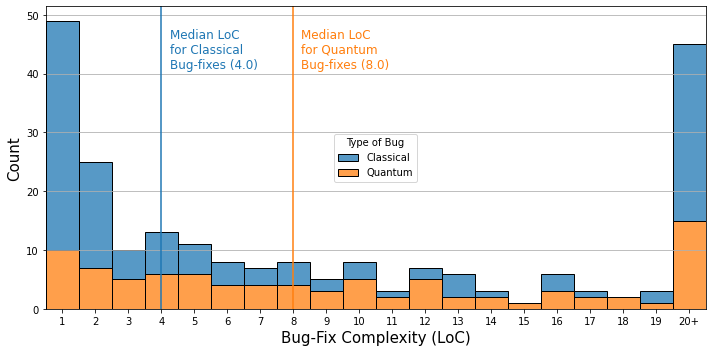

In [35]:
plot_histogram_quantum_vs_classical(
    df_bugs=df_bugs_w_diff,
    column_to_inspect="n_lines",
    cap_value=20,
    out_file_name="RQ5_complexity_lines.pdf",
    out_folder_path=PATH_OUTPUT_RESULTS,
    column_label_name="Bug-Fix Complexity",
    column_abbreviation="LoC",
    legend_placement='center'
)

Complexity normalization: 223 (before) > 223 (after)
['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+', '']


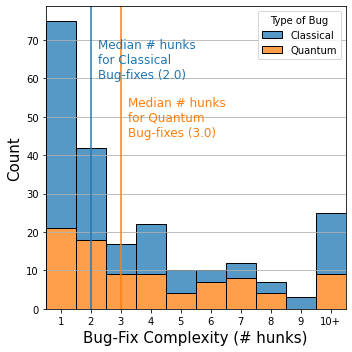

In [61]:
plot_histogram_quantum_vs_classical(
    df_bugs=df_bugs_w_diff,
    column_to_inspect="n_hunks",
    cap_value=10,
    out_file_name="RQ5_complexity_hunks.pdf",
    out_folder_path=PATH_OUTPUT_RESULTS,
    column_label_name="Bug-Fix Complexity",
    column_abbreviation="# hunks",
    legend_placement='upper right',
    median_heights=(45, 60),
    figsize=(5,5)
)

Complexity normalization: 223 (before) > 223 (after)
['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+', '']


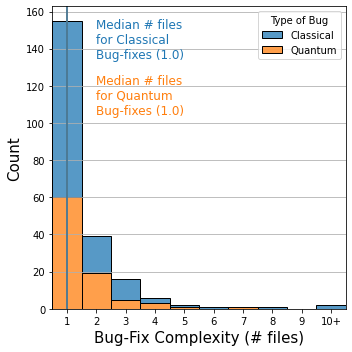

In [59]:
plot_histogram_quantum_vs_classical(
    df_bugs=df_bugs_w_diff,
    column_to_inspect="n_files",
    cap_value=10,
    out_file_name="RQ5_complexity_files.pdf",
    out_folder_path=PATH_OUTPUT_RESULTS,
    column_label_name="Bug-Fix Complexity",
    column_abbreviation="# files",
    legend_placement='upper right',
    median_heights=(105, 135),
    median_shifts=(1.5, 1.5),
    figsize=(5,5)
)